<a href="https://colab.research.google.com/github/MaciejAutuch/Visual_Recognition_Project/blob/main/AI_project_part_3a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI & ML project - Face mask detection

# Part 3a: Model development incl. visualization

## 1. Preparation

Install packages, set random seed, mount Google Drive, unzip processed train and test data (divided in "yes_mask" and "no_mask" folders)

In [ ]:
# install packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [ ]:
# mount google drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# unzip train data and store in colab directory

!unzip /content/gdrive/MyDrive/AI_project/processed_data/train_.zip -d '/content/train_images'

In [ ]:
# unzip train data and store in colab directory

!unzip /content/gdrive/MyDrive/AI_project/processed_data/test_.zip -d '/content/test_images'

In [ ]:
# define path to train and test data

train_path = '/content/train_images/content/train_/'
test_path = '/content/test_images/content/test_/'

## 2. Build batches

Set image and batch size, creat train/validation/test batches

In [ ]:
# set image (in pixel) and batch size (number of pictures in each batch)

image_size = (32, 32)
batch_size = 10

In [ ]:
# define image data generator for train data, rescale images, set validation dataset size

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
# create train batches and assign classes to images

train_batches = train_datagen.flow_from_directory(
    train_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'training')

Found 23546 images belonging to 2 classes.


In [ ]:
# create validation batches and assign classes to images

validation_batches = train_datagen.flow_from_directory(
    train_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'validation')

Found 5886 images belonging to 2 classes.


In [ ]:
# define image data generator for test data, rescale images (no validation split needed)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# create test batches (only one image per batch) and assign classes to images

test_batches = test_datagen.flow_from_directory(
    test_path,
    target_size = image_size,
    batch_size = 1,
    class_mode = 'binary')

Found 9017 images belonging to 2 classes.


## 3. Model building

Create, fit and evaluate model, create confusion matrix

In [ ]:
# set random seed for reproducibility

import random
random.seed(1)
import numpy as np
np.random.seed(2)
import tensorflow as tf
tf.random.set_seed(3)

In [ ]:
# create a CNN model by arbitrarily selecting number of layers and nodes
# different paramters have been tried out manually at the beginning
# comprehensive grid search conducted in part 3b notebook

model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation = 'relu'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(64, activation = 'relu'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(16, activation = 'relu'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')])

In [ ]:
# compile model with suitable parameters for binary classification problem (yes/no mask)

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# fit the model on train data (number of epochs arbitrarily selected as well)
# evaluate each epoch on validation data

model.fit(train_batches,
          epochs = 15,
          validation_data = validation_batches)

Epoch 1/15
2355/2355 [==============================] - 38s 15ms/step - loss: 0.3347 - accuracy: 0.8543 - val_loss: 0.4133 - val_accuracy: 0.8634
Epoch 2/15
2355/2355 [==============================] - 29s 12ms/step - loss: 0.2842 - accuracy: 0.8754 - val_loss: 0.3710 - val_accuracy: 0.8660
Epoch 3/15
2355/2355 [==============================] - 29s 12ms/step - loss: 0.2717 - accuracy: 0.8850 - val_loss: 0.3113 - val_accuracy: 0.8753
Epoch 4/15
2355/2355 [==============================] - 28s 12ms/step - loss: 0.2571 - accuracy: 0.8921 - val_loss: 0.2523 - val_accuracy: 0.8953
Epoch 5/15
2355/2355 [==============================] - 29s 12ms/step - loss: 0.2545 - accuracy: 0.8937 - val_loss: 0.2377 - val_accuracy: 0.9028
Epoch 6/15
2355/2355 [==============================] - 28s 12ms/step - loss: 0.2490 - accuracy: 0.8960 - val_loss: 0.2719 - val_accuracy: 0.8882
Epoch 7/15
2355/2355 [==============================] - 28s 12ms/step - loss: 0.2463 - accuracy: 0.8962 - val_loss: 0.3287 -

In [ ]:
# evaluate trained model on test data

model.evaluate(test_batches)

9017/9017 [==============================] - 36s 4ms/step - loss: 0.4990 - accuracy: 0.7870


[0.49896231293678284, 0.7869579792022705]

The accuracy of the model is **78.7%**.

Create a confusion matrix of classified test images:

In [ ]:
# unzip all of the processed test data and store in colab directory

!unzip /content/gdrive/MyDrive/AI_project/processed_data/test_images_processed.zip -d '/content/test_images_all'

In [ ]:
# create new test batches (only one image per batch) and assign classes to images
# this time, set shuffle to 'False' for being able to assign 

test_batches_sorted = test_datagen.flow_from_directory(
    test_path,
    target_size = image_size,
    batch_size = 1,
    class_mode = 'binary',
    shuffle = False)

Found 9017 images belonging to 2 classes.


In [ ]:
# predict output of each test image (between 0 and 1)

y_prob_test = model.predict(test_batches_sorted)

In [ ]:
# test shape of output array

y_prob_test.shape

(9017, 1)

In [ ]:
# create a new array that assigns a 1 ("yes_mask") if output is higher than 80%
# and a 0 ("no_mask") if output is equal to or lower than 80%

y_classes_test = []

for x in y_prob_test:
  if x > 0.8:
    y_classes_test.append(1)
  else:
    y_classes_test.append(0)

The threshold for an image being classified as "yes_mask" is set to 80% in order to be more confident that a mask is present in an image. 

This array contains the **predicted labels**.

In [ ]:
# create a new array that assigns a 0 ("no_mask") to the first 3817 entries
# and a 1 ("yes_mask") to the next 5200 entries (= 9017 test images overall)

test_labels = []

for i in range(0, 3817):
  test_labels.append(0)
for g in range(0, 5200):
  test_labels.append(1)

This is possible because the new test batch ("test_batches_sorted") is not shuffled and due to folder structure (first "no_mask", second "yes_mask") images without and with masks are sorted in this order.

This array contains the **true labels**.

In [ ]:
# convert list of test labels into array

test_labels = np.asarray(test_labels)
test_labels.shape

(9017,)

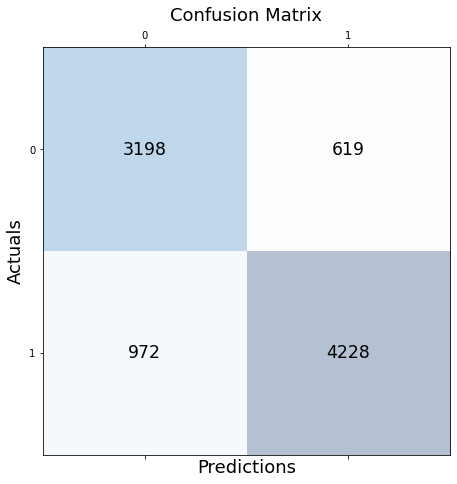

In [ ]:
# create a confusion matrix

conf_matrix_test = confusion_matrix(y_true=test_labels, y_pred=y_classes_test)

# plot the confusion matrix using matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix_test, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix_test.shape[0]):
    for j in range(conf_matrix_test.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_test[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

The matrix shows that 82.4% of the test images are classified correctly (after setting the confidence threshold to 80%). Only 6.9% of the test images were classified as displaying a mask although there was no mask present (false positives).

## 4. Evaluation on own images

Run the model again on our own images as a second test dataset

In [ ]:
# unzip own test data and store in colab directory

!unzip /content/gdrive/MyDrive/AI_project/own_images.zip -d '/content/own_images'

In [ ]:
# define path to own test data

own_images_all = '/content/own_images/own_images_all/'
own_images_labels = '/content/own_images/own_images_labels/'

In [ ]:
# define new image data generator for own test data, rescale images (no validation split needed)

own_test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# create new test batches (only one image per batch) and assign classes to images

own_test_batches = own_test_datagen.flow_from_directory(
    own_images_labels,
    target_size = image_size,
    batch_size = 1,
    class_mode = 'binary',
    shuffle=False)

Found 52 images belonging to 2 classes.


In [ ]:
# evaluate trained model on own test data

model.evaluate(own_test_batches)

52/52 [==============================] - 1s 12ms/step - loss: 0.3561 - accuracy: 0.8462


[0.35614174604415894, 0.8461538553237915]

The accuracy of the model is **84.6%**.

Create a confusion matrix of classified own test images:

In [ ]:
# predict output of each own test image (between 0 and 1)

y_prob = model.predict(own_test_batches) 

In [ ]:
# create a new array that assigns a 1 ("yes_mask") if output is higher than 80%
# and a 0 ("no_mask") if output is equal to or lower than 80%

y_classes = []

for x in y_prob:
  if x > 0.8:
    y_classes.append(1)
  else:
    y_classes.append(0)

The threshold for an image being classified as "yes_mask" is set to 80% in order to be more confident that a mask is present in an image.

In [ ]:
# convert list of test labels into array

y_classes = np.asarray(y_classes)
y_classes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0])

This array contains the **predicted labels**.

In [ ]:
# create a new array that assigns a 0 ("no_mask") to the first 21 entries
# and a 1 ("yes_mask") to the next 31 entries (= 52 own test images overall)

labels = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
          1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

This is possible because our own test batch ("own_test_batches") is not shuffled and due to folder structure (first "no_mask", second "yes_mask") images without and with masks are sorted in this order.

This array contains the **true labels**.

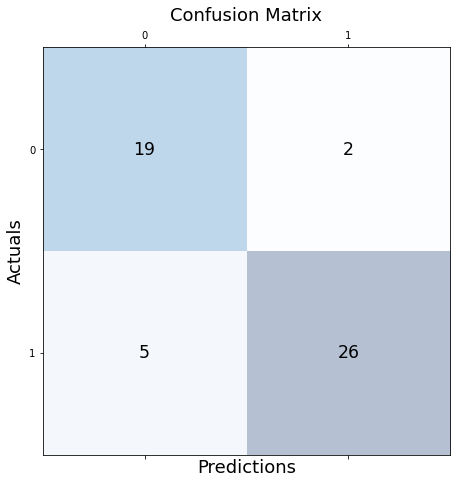

In [ ]:
# create a confusion matrix

conf_matrix = confusion_matrix(y_true=labels, y_pred=y_classes)

# plot the confusion matrix using matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

The matrix shows that 86.5% of our own test images are classified correctly (after setting the confidence threshold to 80%). Only 3.8% of our own test images were classified as displaying a mask although there was no mask present (false positives).

## 5. Visualization

Plot our own classified images

In [ ]:
# create a file list of images labeld as "no_mask"

file_list_no_mask = os.listdir(own_images_labels + 'no_mask/') # creating the list with images in the order
file_list_no_mask.sort()

In [ ]:
# create a file list of images labeld as "yes_mask"

file_list_yes_mask = os.listdir(own_images_labels + 'yes_mask/') # creating the list with images in the order
file_list_yes_mask.sort()

In [ ]:
# create array with class names

class_names = ['no_mask', 'yes_mask']

In [ ]:
# create lust with own test images

test_pictures = []

for img in file_list_no_mask:
  path = own_images_labels + 'no_mask/' + img
  img1 = image.load_img(path)
  img1 = img1.resize((32, 32))  # resizing the picture to match the model
  Y = image.img_to_array(img1)  # converting the picture to an array  
  test_pictures.append(Y)       # adding the array to the list

for img in file_list_yes_mask:
  path = own_images_labels + 'yes_mask/' + img
  img1 = image.load_img(path)
  img1 = img1.resize((32, 32))  # resizing the picture to match the model
  Y = image.img_to_array(img1)  # converting the picture to an array  
  test_pictures.append(Y)       # adding the array to the list

In [ ]:
# convert list of test images into array

test_pictures = np.asarray(test_pictures)
test_pictures

In [ ]:
# create function that can plot images

def plot_image(i, predictions_array, true_label, img, y_prob):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img.astype('uint8'))  # changed the imshow so it can show RGB photos

  predicted_label = predictions_array
  if predicted_label[i] == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[y_classes[i]],
                                100*y_prob[i][0],
                                class_names[true_label]),
                                color=color)

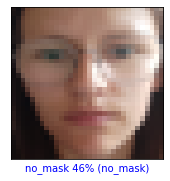

In [ ]:
# test with one of own test images

i = 3
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, y_classes, labels, test_pictures, y_prob)
plt.show()

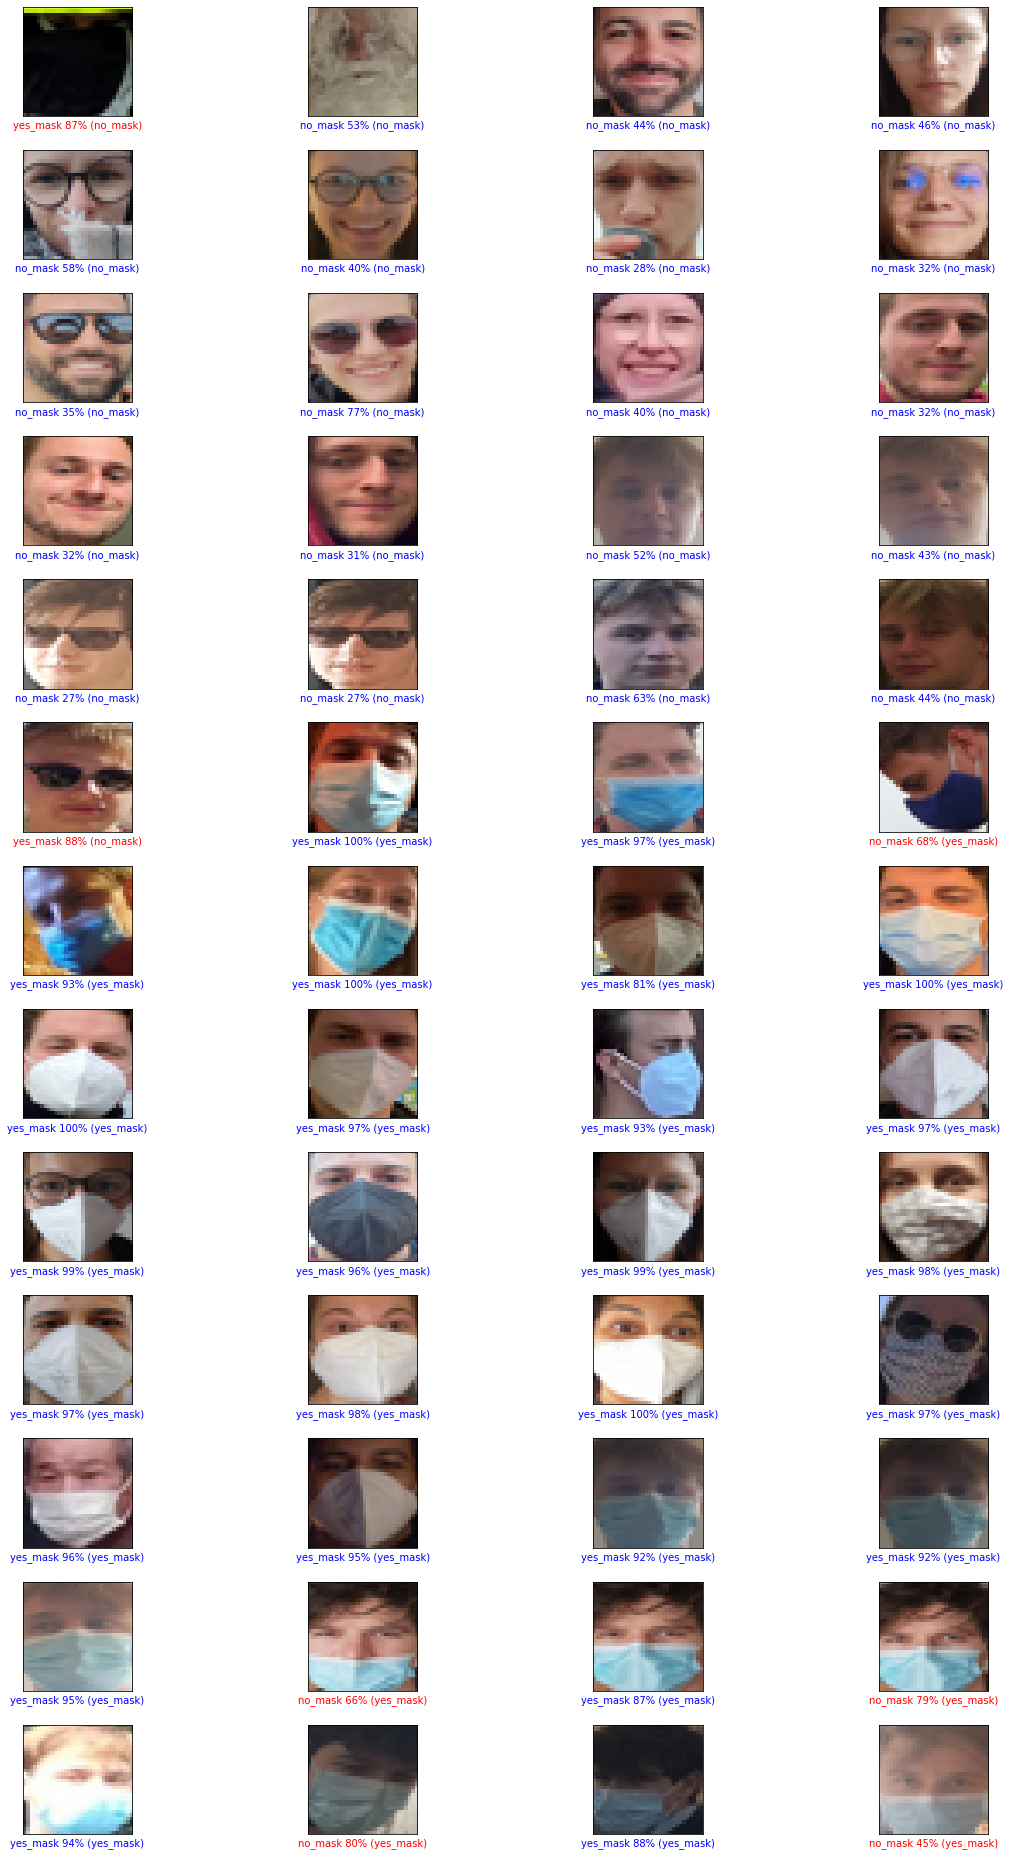

In [ ]:
# plot 52 test images, their predicted labels (first) and their true labels (in brackets)
# color correct predictions in blue and incorrect predictions in red

num_rows = 13
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, y_classes, labels, test_pictures, y_prob)
plt.tight_layout()
plt.show()

In [ ]:
# export notebook to html

!jupyter nbconvert --to html '/content/AI_project_part_3a.ipynb'

[NbConvertApp] Converting notebook /content/AI_project_part_3a.ipynb to html
[NbConvertApp] Writing 729422 bytes to /content/AI_project_part_3a.html
